# Regression

A regression task in data science involves predicting a continuous output variable based on input features. It is commonly used for tasks such as predicting prices, temperatures, or other real-valued quantities.

Mathematically, regression can be represented as:

$ y = f(X) + \varepsilon $

- $ y $ is the continuous output variable.
- $ X $ represents the input features.
- $ f $ is the unknown function that maps inputs to outputs.
- $ \varepsilon $ is the random error term.

In machine learning, the goal is to approximate the function \( f \) by learning from the training data so that the model can make accurate predictions on new, unseen data. This can be expressed as:

$ \hat{y} = \hat{f}(X) $

- $ \hat{y} $ is the predicted output.
- $\hat{f} $ is the learned approximation of the true function $ f$.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In machine learning, the training set is used to train the model, while the test set evaluates its performance on new, unseen data. The split ensures the model's ability to generalize beyond the training data and helps prevent overfitting.

**Exercice**: find how to perform a train test split using the [sklearn syntax](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)
X_train
X_test
y_train
y_test


array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

## Simple Linear Regression

Linear regression aims to find the best values for the coefficients that minimize the difference between the predicted and actual values.

**Exercice**: make a prediction with a linear regression using the [sklearn syntax](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
reg = lin_reg.fit(X_train, y_train)

In [32]:
y_pred = lin_reg.predict(X_test)

In [33]:
y_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [34]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [35]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)

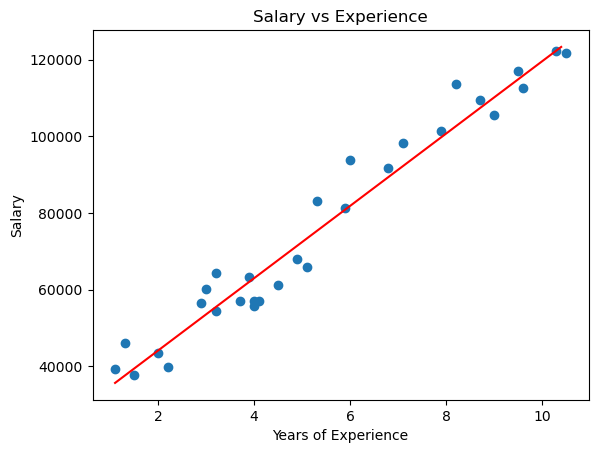

In [36]:
plt.scatter(X, y)
plt.plot(X_grid, lin_reg.predict(X_grid), color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Adding Polynomial features 

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X_train)
X_poly_3 = poly_reg_3.fit_transform(X_train)

In [25]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y_train)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y_train)

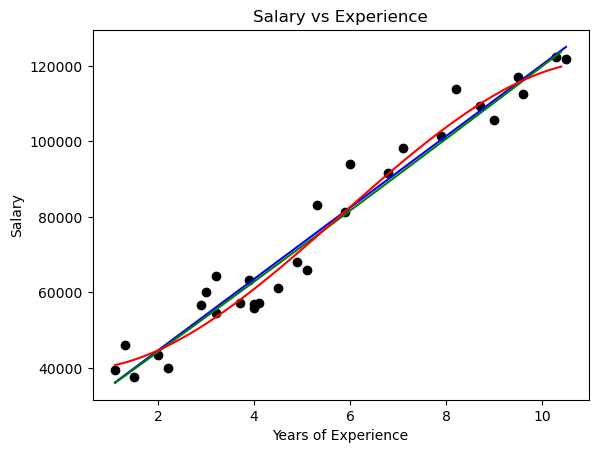

In [26]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.plot(X_grid, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X_grid)), color='g')
plt.plot(X_grid, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X_grid)), color='r')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Decision Trees

A decision tree in machine learning is a predictive model that uses a tree-like structure to make decisions based on input features, ultimately assigning outcomes. They are commonly employed for classification and regression tasks due to their versatility and interpretability.

**Exercice**: make a prediction with the decision tree regressor.

In [38]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_stat=0)
dec = regressor.fit(X, y)

TypeError: DecisionTreeRegressor.__init__() got an unexpected keyword argument 'random_stat'

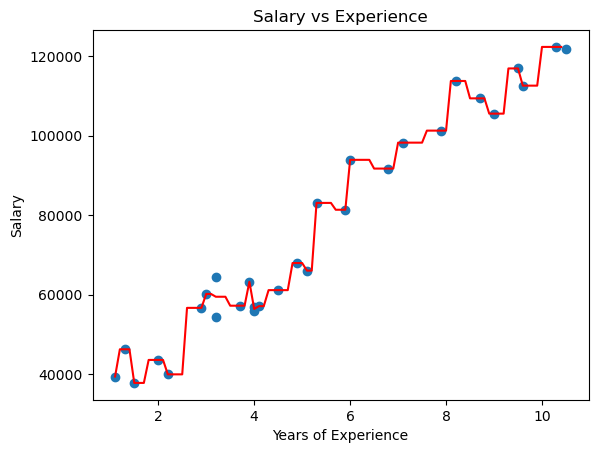

In [28]:
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid), color='r')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Overfitting in machine learning occurs when a model learns the training data too precisely, capturing noise and details that don't generalize well to new data. It results in high accuracy on training data but poor performance on unseen data. Prevention methods include cross-validation, regularization, feature selection, and using simpler models.

**Exercice**: Comment the previous plot

## Random forest

Decision Trees tend to overfit the model. 

A random forest is an ensemble learning method in machine learning that constructs multiple decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees. It combines the predictions from multiple models to improve accuracy and reduce overfitting, making it a powerful and widely used algorithm in various applications.

**Exercice**: make a prediction with the decision tree regressor.

In [29]:
from  sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

RandomForestRegressor(random_state=42)

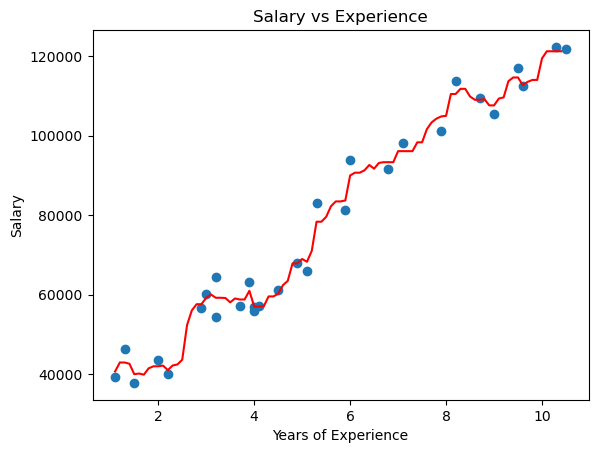

In [30]:
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid), color='r')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Exercice**: Comment the previous plot


## Support vector regression

A support vector machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates different classes in the feature space. In the case of classification, this hyperplane maximizes the margin between classes, and the data points closest to the hyperplane are called support vectors. SVM is effective in high-dimensional spaces, and it can handle complex relationships in the data through the use of kernel functions, which transform the input features into a higher-dimensional space. This allows SVM to capture non-linear decision boundaries. 

In [39]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf').fit(X_train, y_train)

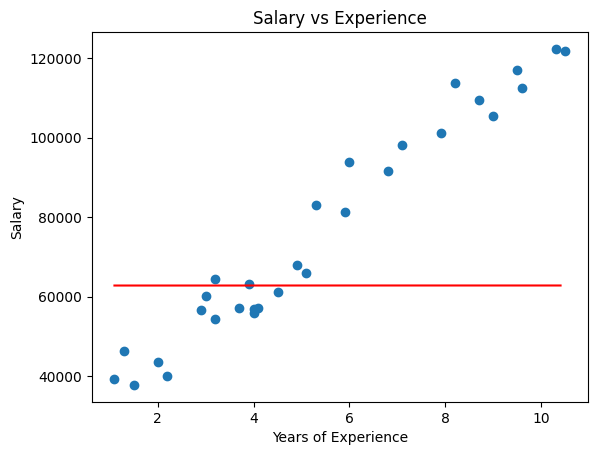

In [80]:
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid), color='r')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Here we can see that the model performs very poorly.

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1,1))

In [41]:
regressor = SVR(kernel='rbf').fit(X, y)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


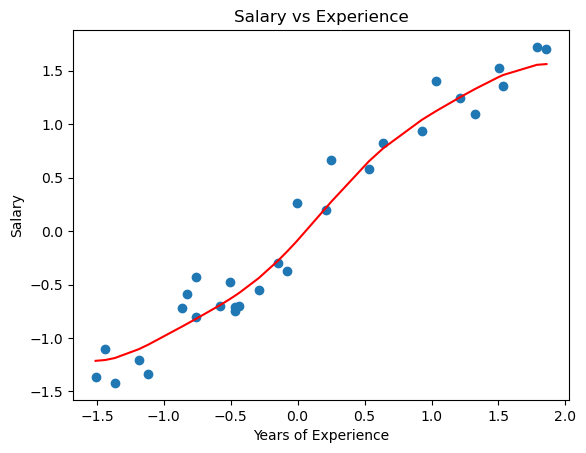

In [42]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='r')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Exercice** : Comment.